Кабанова Е. R42951  
Лабораторная работа №5  
Нейронные сети. Алгоритм word2vec.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from logprogress import *
matplotlib.rc('font', family='DejaVu Sans')

In [5]:
import re
source_str=open('text.txt', 'r', encoding='UTF-8').read()
source_words=re.findall('(\w+)|\n\n+|[.?!]',source_str,re.UNICODE)
print('Список слов:',source_words[:10])
print('Всего слов, включая концы предложений:',len(source_words))

Список слов: ['Лев', 'Николаевич', 'Толстой', '', 'Анна', 'Каренина', '', 'Мне', 'отмщение', 'и']
Всего слов, включая концы предложений: 294906


In [6]:
from collections import Counter
all_words=Counter(source_words)
number_of_sentences=all_words.pop('',None)
print('Всего предложений:',number_of_sentences)
print('Всего различных слов:',len(all_words))
print('Самые часто встречающиеся слова:',all_words.most_common(10))

Всего предложений: 23543
Всего различных слов: 35351
Самые часто встречающиеся слова: [('и', 11972), ('не', 6296), ('что', 5786), ('в', 5380), ('он', 4457), ('на', 3456), ('с', 3282), ('она', 2644), ('его', 2549), ('как', 2352)]


In [7]:
import itertools
sentences=[list(y) for x, y in itertools.groupby(source_words, lambda z: z == '') if not x]
for sentence in sentences:
    first_word_lower_case=sentence[0].lower()
    if first_word_lower_case in all_words: sentence[0]=first_word_lower_case
print('Начало текста:',sentences[:6])

Начало текста: [['Лев', 'Николаевич', 'Толстой'], ['Анна', 'Каренина'], ['мне', 'отмщение', 'и', 'аз', 'воздам'], ['часть', 'ПЕРВАЯ'], ['I'], ['все', 'счастливые', 'семьи', 'похожи', 'друг', 'на', 'друга', 'каждая', 'несчастливая', 'семья', 'несчастлива', 'по', 'своему']]


In [8]:
all_words=Counter([word for sentence in sentences for word in sentence])
number_of_sentences=len(sentences)
print('Всего предложений:',number_of_sentences)
print('Всего различных слов:',len(all_words))
print('Самые часто встречающиеся слова:',all_words.most_common(10))

Всего предложений: 21484
Всего различных слов: 33534
Самые часто встречающиеся слова: [('и', 12906), ('не', 6529), ('что', 6129), ('в', 5719), ('он', 5546), ('на', 3594), ('она', 3432), ('с', 3358), ('я', 3189), ('как', 2678)]


In [9]:
least_count=50
max_count=10000
common_words={k: v for k, v in all_words.items() if v>=least_count and v<=max_count}
print('Число встречающихся минимум',least_count,"раз слов:",len(common_words))

Число встречающихся минимум 50 раз слов: 560


In [10]:
words_sorted_by_frequency=list(map(lambda x: x[0], sorted(common_words.items(), key=lambda x: -x[1])))
words_codes=dict([(w,c) for c,w in enumerate(words_sorted_by_frequency)])
# эти коллекции можно использовать для сопоставления словам чисел и обратно
print(words_sorted_by_frequency[words_codes['ты']])

ты


In [11]:
encoded_text=[[words_codes[word] for word in sentence if word in words_codes] for sentence in sentences]
# убираем пустые предложения меньше заданной длины
minimal_length=4
encoded_text=[sentence for sentence in encoded_text if len(sentence)>=minimal_length]
print('Начало закодированного текста:', encoded_text[:6])
print('Число предложений:', len(encoded_text))

Начало закодированного текста: [[15, 347, 4, 506, 27, 391], [311, 1, 332, 29, 2, 6, 2, 67, 550, 461, 1, 0, 70, 282, 6, 84, 2, 550], [219, 11, 46, 173, 478], [15, 1, 47, 2, 67, 1, 4, 292, 103, 157, 235, 64, 44], [311, 0, 31, 245, 224, 173, 0, 16, 231], [392, 27, 8, 6, 41, 483, 320, 40, 321, 94, 88, 80, 542]]
Число предложений: 14191


In [12]:
def decode(txt):
    return words_sorted_by_frequency[txt] if isinstance(txt,(int,np.integer)) else list(map(decode, list(txt)))

print('Раскодированное начало:', decode(encoded_text[:6]))

Раскодированное начало: [['все', 'друг', 'на', 'друга', 'по', 'своему'], ['жена', 'что', 'муж', 'был', 'в', 'с', 'в', 'их', 'доме', 'мужу', 'что', 'не', 'может', 'жить', 'с', 'ним', 'в', 'доме'], ['положение', 'это', 'уже', 'день', 'всеми'], ['все', 'что', 'нет', 'в', 'их', 'что', 'на', 'люди', 'более', 'между', 'собой', 'чем', 'они'], ['жена', 'не', 'из', 'своих', 'мужа', 'день', 'не', 'было', 'дома'], ['дети', 'по', 'как', 'с', 'ей', 'новое', 'место', 'еще', 'вчера', 'со', 'во', 'время', 'обеда']]


In [13]:
def random_context(text, distance_between_words=5):
    random_sentence=text[np.random.randint(0,len(text))]
    word_index=np.random.randint(0,len(random_sentence))
    word=random_sentence[word_index]
    left_context=random_sentence[max(0,word_index-distance_between_words):word_index]
    right_context=random_sentence[(word_index+1):min(len(random_sentence),word_index+distance_between_words)]
    return word, left_context+right_context

print('Случайный контекст:', decode(random_context(encoded_text)))

Случайный контекст: ['бы', ['если', 'вы', 'как', 'вы', 'мне']]


In [15]:
# Функции потерь возвращают пару: значение функции, градиент
def loss_function_sq(Dx,y):
    delta=Dx-y
    return np.dot(delta,delta), delta

def loss_function_cr(tx,y):
    return -np.sum(tx*np.log(y)), -tx/y

In [16]:
def linear_layer(theta, x):
    return np.dot(theta, x)


def linear_layer_optimize(theta, x):
    index, = np.where(x == 1)
    return theta[:, index[0]]    
    

def linear_layer_dx(dx, theta):
    return np.dot(dx, theta)

def linear_layer_dtheta(dx, x):
    return dx[:,None]*x[None,:]

In [17]:
# Функции активации возращают пару: значение функции на аргументе, вспомогательные значения.
# Вспомогательные значения используется позже для ускорения вычисления градинта.
def logistic_function(x):
    t=np.exp(-x)
    return 1/(1+t), t

# Функция для вычисления градиента принимают на вход результат (y,t) вычисления функции активации.
def logistic_function_dx(dx, y, t):
    return dx*t*y*y

In [18]:
def softmax(x):
    t=np.exp(-x)
    return t/np.sum(t)

def softmax_dx(dx,y):
    # y=softmax(x)
    w=y*dx
    return y*np.sum(w)-w

In [19]:
dimensionality=len(words_sorted_by_frequency)

def context_to_vector(context):
    result=np.zeros(dimensionality)
    for word in context: result[word]+=1./len(context)
    return result 

print("Число слов в случайном контексте:", np.sum(0!=context_to_vector(random_context(encoded_text)[1])))

Число слов в случайном контексте: 8


Wall time: 1 ms


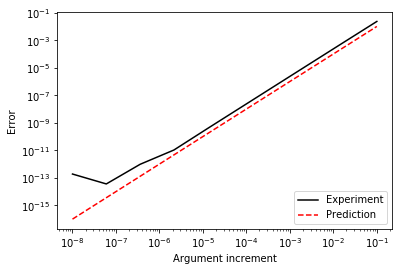

In [20]:
def neural_network(A,B,x):
    return softmax(linear_layer(B, linear_layer(A, x)))[0]

def loss(A, B, x, tx, return_grad=True):
    z3=linear_layer(A, x)
    z2=linear_layer(B, z3)
    z1=softmax(z2)
    R,dz1=loss_function_cr(tx, z1)
    if not return_grad: return R
    dz2=softmax_dx(dz1, z1)
    dB=linear_layer_dtheta(dz2, z3)
    dz3=linear_layer_dx(dz2, B)
    dA=linear_layer_dtheta(dz3, x)
    return R, dA, dB    

def grad(A, B, x, tx, return_grad=True):
    z3=linear_layer(A, x)
    z2=linear_layer(B, z3)
    z1=softmax(z2)
    R,dz1=loss_function_cr(tx, z1)
    if not return_grad: return R
    dz2=softmax_dx(dz1, z1)
    dz3=linear_layer_dx(dz2, B)
    dx=linear_layer_dx(dz3, A)
    return R, dx

dim=55
x=np.random.rand(dim)
t=np.random.rand(dim)
A=np.random.rand(dim, dim)
B=np.random.rand(dim, dim)
DA=np.random.rand(dim, dim)
DB=np.random.rand(dim, dim)*0
%time R,dA,dB=loss(A,B,x,t)
derror=np.sum(DA*dA)+np.sum(DB*dB)
epsilon=np.logspace(-8,-1,10)
error=np.empty(len(epsilon))
for n in range(len(epsilon)):
    error[n]=loss(A+epsilon[n]*DA,B+epsilon[n]*DB,x,t,return_grad=False)-R-derror*epsilon[n]
plt.loglog(epsilon, np.abs(error), '-k')
plt.loglog(epsilon, epsilon*epsilon, '--r')
plt.xlabel("Argument increment")
plt.ylabel("Error")
plt.legend(['Experiment','Prediction'],loc=4)
plt.show()

In [21]:
def make_batch(text, size=300):
    C=[]; W=[]
    for _ in range(size):
        word, context=random_context(text)
        W.append(context_to_vector([word]))
        C.append(context_to_vector(context))
    return W, C

def train_on_batch(A, B, batch, number_of_steps=3, step_size=5):
    batch_size=len(batch[0])
    history=[]
    for _ in range(number_of_steps):
        dA=np.zeros(A.shape); dB=np.zeros(B.shape); 
        error=0
        for W,C in zip(*batch):
            R,DA,DB=loss(A,B,W,C)
            error+=R; dA+=DA; dB+=DB
        A-=step_size/batch_size*dA
        B-=step_size/batch_size*dB
        history.append(error/batch_size)
    return history

def train_network(A, B, text, test=None, number_of_steps=1000, debug=False):
    report_each=number_of_steps/10
    history=[]
    if not test is None: 
        print("Initial error {}".format(test_network(A, B, test_text)))
    try:
        for n in log_progress(range(1,number_of_steps+1),name='Batch'):
            error=train_on_batch(A, B, make_batch(text))
            if debug: print(n,":",error[-1])
            if not test is None and n%report_each==0: 
                print("Epoch {}, generalization error {}".format(n, test_network(A, B, test_text)))
            history.extend(error)
    except KeyboardInterrupt:
        pass
    return history

def test_network(A, B, text, number_of_samples=1000):
    error=0
    for _ in range(number_of_samples):
        word, context=random_context(text)
        W=context_to_vector([word])
        C=context_to_vector(context)
        error+=loss(A,B,W,C,return_grad=False)
    return error/number_of_samples

In [22]:
ratio=0.9
train_text=encoded_text[:int(ratio*len(encoded_text))]
test_text=encoded_text[int(ratio*len(encoded_text)):]
features=50
A=np.random.rand(features,dimensionality)
B=np.random.rand(dimensionality,features)

Initial error 6.945078574293238


Epoch 100, generalization error 5.343850026913075
Epoch 200, generalization error 5.404389960182165
Epoch 300, generalization error 5.312741398114064
Epoch 400, generalization error 5.289856778576977
Epoch 500, generalization error 5.28731235328834
Epoch 600, generalization error 5.337358421308595
Epoch 700, generalization error 5.284289554434118
Epoch 800, generalization error 5.2600099179222015
Epoch 900, generalization error 5.274206186906656
Epoch 1000, generalization error 5.218489901983082
Wall time: 4min 59s


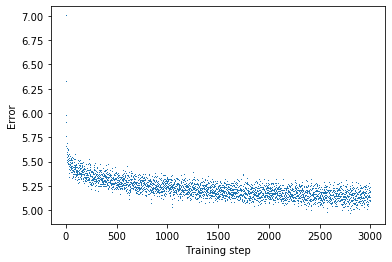

In [23]:
%time history=train_network(A, B, train_text, test=test_text)
plt.plot(history,',')
plt.xlabel("Training step")
plt.ylabel("Error")
plt.show()

In [24]:
def word2vec(B, n):
    return B[n,:]

def similar_words(B, vec):
    dist=np.sum((B-vec[None,:])**2, axis=1)
    return sorted(enumerate(dist), key=lambda x: x[1])

def distance_matrix(B):
    return np.sum((B[:,:,None]-B[:,None,:])**2, axis=0)

In [25]:
print(words_sorted_by_frequency)

['не', 'что', 'в', 'он', 'на', 'она', 'с', 'я', 'как', 'его', 'но', 'это', 'то', 'к', 'ее', 'все', 'было', 'так', 'сказал', 'а', 'же', 'ему', 'о', 'за', 'Левин', 'только', 'ты', 'по', 'у', 'был', 'когда', 'из', 'сказала', 'для', 'бы', 'теперь', 'от', 'да', 'вы', 'была', 'еще', 'ей', 'мне', 'Кити', 'они', 'него', 'уже', 'нет', 'очень', 'быть', 'меня', 'чтобы', 'Вронский', 'этого', 'себя', 'Анна', 'себе', 'были', 'ни', 'если', 'ничего', 'того', 'ну', 'том', 'чем', 'ней', 'Алексей', 'их', 'Степан', 'Аркадьич', 'может', 'Александрович', 'вот', 'есть', 'тем', 'надо', 'ли', 'опять', 'или', 'потому', 'время', 'мог', 'говорил', 'будет', 'ним', 'нее', 'мы', 'до', 'во', 'руку', 'Долли', 'эти', 'которые', 'всегда', 'со', 'этом', 'раз', 'лицо', 'сказать', 'этот', 'вас', 'дело', 'Левина', 'более', 'вдруг', 'свою', 'после', 'который', 'при', 'больше', 'своей', 'без', 'знал', 'где', 'никогда', 'потом', 'жизни', 'говорить', 'хорошо', 'знаю', 'которое', 'об', 'даже', 'пред', 'хотел', 'тебя', 'Сергей', 

In [26]:
def show_similar(B, vec, count=10):
    for code,freq in similar_words(B, vec)[:count]:
        print("{}/{}".format(decode(code),int(freq)),end=" ")

words_to_compare=['Анна','Степан','давно','много','руки']
for word in words_to_compare:
    print(word,":",end=" ")
    show_similar(B, word2vec(B, words_codes[word]))
    print()

Анна : Анна/0 Долли/3 она/4 мужа/5 его/5 Кити/5 ребенка/5 княгиня/5 сына/5 теперь/5 
Степан : Степан/0 Аркадьич/6 Весловский/7 невольно/7 весело/7 Свияжский/7 он/7 весь/8 через/8 брата/8 
давно : давно/0 всегда/6 теперь/6 вперед/6 как/6 хочет/6 дома/6 знаю/6 муж/6 сам/6 
много : много/0 муж/3 времени/4 человека/4 этот/4 действительно/4 теперь/4 дома/4 после/4 часто/4 
руки : руки/0 лицо/3 выражение/4 быстро/4 голову/4 лица/4 ноги/4 своего/4 под/4 несмотря/4 


In [27]:
# Попробуем проанализировать отношения слов
def show_relative(n1,n2,n3):
    w1=words_codes[n1]; v1=word2vec(B, w1)
    w2=words_codes[n2]; v2=word2vec(B, w2)
    w3=words_codes[n3]; v3=word2vec(B, w3)
    v4=v2-v1+v3
    print("Как '{}' относится к '{}', также к '{}' относятся следующие слова в порядке убывания уверенности:".format(decode(w1),decode(w2),decode(w3)))
    show_similar(B, v4)
    print("\n")

show_relative('Анна','Степан','она')
show_relative('Степан','Анна','он')

Как 'Анна' относится к 'Степан', также к 'она' относятся следующие слова в порядке убывания уверенности:
Степан/4 Аркадьич/9 он/9 весь/11 Левин/12 невольно/12 нем/12 Вронский/12 говорят/12 за/12 

Как 'Степан' относится к 'Анна', также к 'он' относятся следующие слова в порядке убывания уверенности:
Анна/7 она/9 его/12 мужа/12 Кити/12 говорила/12 знала/13 чтобы/13 это/13 могла/13 



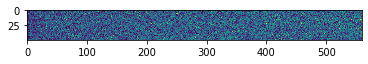

In [28]:
# Выведем все вектора слов
plt.imshow(np.abs(B.T), interpolation='none')
plt.show()

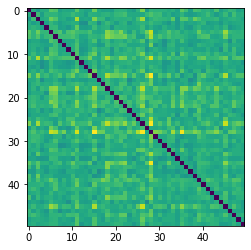

In [29]:
# Выведем матрицу расстояний между словами
plt.imshow(distance_matrix(B), interpolation='none')
plt.show()

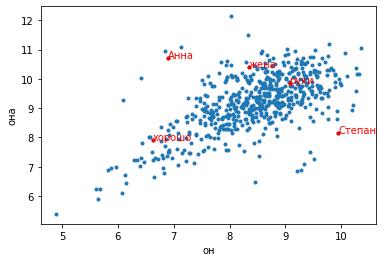

In [30]:
n1='он'; n2='она'
ns=['Анна','Степан','жена','хорошо','руки']
w1=words_codes[n1]; w2=words_codes[n2];
v1=word2vec(B, w1); v2=word2vec(B, w2); 
p1=np.dot(B, v1); p2=np.dot(B, v2); 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(p1,p2,'.')
for n in ns:
    w=words_codes[n]
    ax.plot(p1[w],p2[w],'.r')
    ax.annotate(n, xy=(p1[w],p2[w]),color='r')
plt.xlabel(n1); plt.ylabel(n2);
plt.show()

In [82]:
import gensim
import multiprocessing

model = gensim.models.Word2Vec(
        sg=0,
        min_count=3,
        window=5,
        size=200, 
        negative=3,
        hs=1,
        workers=multiprocessing.cpu_count())

In [83]:
model.build_vocab(sentences)
model.train(sentences, epochs=model.epochs, total_examples=model.corpus_count)

(933885, 1356815)

In [84]:
words = list(model.wv.vocab)
print(words[:10])

['Анна', 'Каренина', 'мне', 'и', 'часть', 'I', 'все', 'счастливые', 'семьи', 'похожи']


C:\Users\806607\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


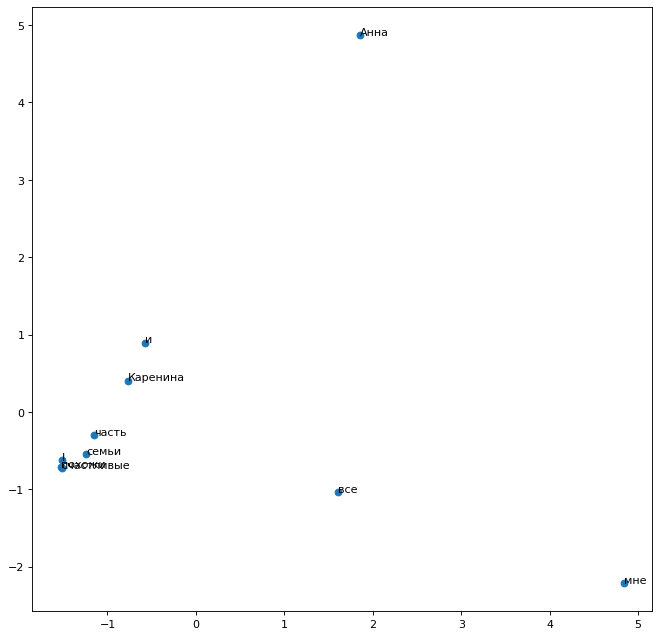

In [89]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 10), dpi=80)

X = model[model.wv.vocab]
X = X[:10]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:, 0], coords[:, 1])
words = list(model.wv.vocab)
words = words[:10]

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))

plt.show()

In [87]:
result = model.most_similar(['Анна', 'Каренина'], topn=5)
print(result)

[('Долли', 0.9267134666442871), ('Кити', 0.9083345532417297), ('княгиня', 0.9075993895530701), ('Бетси', 0.8977770805358887), ('она', 0.8587820529937744)]


C:\Users\806607\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
